In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path =r"C:\Users\ap101\INSTACART BASKET ANALYSIS"

In [3]:
path

'C:\\Users\\ap101\\INSTACART BASKET ANALYSIS'

In [4]:
df_ord_prods_cust_new = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','Task_4.10.pkl'))

In [5]:
df_ord_prods_cust_new.shape

(32641268, 37)

# Key Questions from Prject Brief

1. The sales team needs to know what the busiest days of the week and hours of the days are.

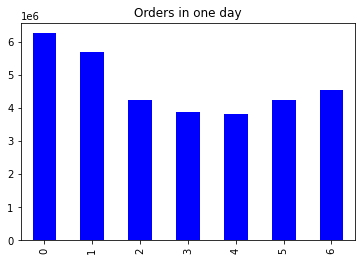

In [9]:
orders_day_of_week = df_ord_prods_cust_new['orders_day_of_week'].value_counts().sort_index().plot.bar(title = 'Orders in one day', color=['blue'])

In [10]:
# Export file
orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '_bargraph_orders_day_of_week.png'))

In [11]:
crosstab_busiestday_week = pd.crosstab(df_ord_prods_cust_new['orders_day_of_week'], df_ord_prods_cust_new['busiest_day'], dropna = False )

In [12]:
crosstab_busiestday_week

busiest_day,Busiest day,Least busy,Regularly busy
orders_day_of_week,,,
0,6252941,0,0
1,0,0,5696724
2,0,0,4243173
3,0,0,3868747
4,0,3812390,0
5,0,0,4236989
6,0,0,4530304


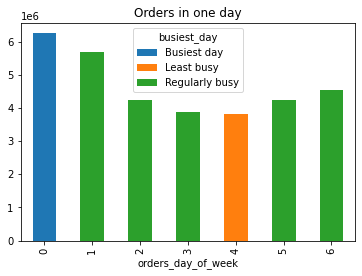

In [13]:
crosstab_busiestday_week = crosstab_busiestday_week.plot(kind = 'bar', stacked = True, title = 'Orders in one day')

In [14]:
# Export visualization
crosstab_busiestday_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_busiestday_week.png'))

2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times

In [18]:
avg_per_hour = df_ord_prods_cust_new.groupby('order_hour_of_day').agg({'prices': ['mean']})

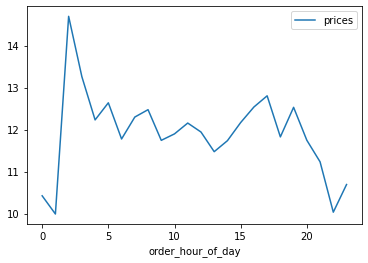

In [19]:
avg_per_hour_chart = sns.lineplot(data = avg_price_per_hour)

In [20]:
# Export visual
avg_per_hour_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_per_hour.png'))

In [21]:
crosstab_busy_hour_day = pd.crosstab(df_ord_prods_cust_new['order_hour_of_day'], df_ord_prods_cust_new['busiest_day'], dropna = False )

In [22]:
crosstab_busy_hour_day

busiest_day,Busiest day,Least busy,Regularly busy
order_hour_of_day,,,
0,39121,24885,156331
1,22687,13628,80274
2,12835,8041,49028
3,8926,6376,36373
4,8435,6960,38241
5,11724,12088,64849
6,35178,40103,217252
7,134276,114176,648711
8,308390,195367,1226114


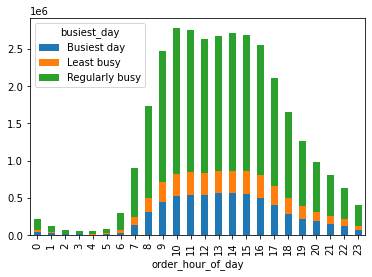

In [24]:
crosstab_busy_hour_day = crosstab_busy_hour_day.plot(kind = 'bar', stacked = True)

In [25]:
# Export visualization
crosstab_busy_hour_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_busy_hour_day.png'))

3. Instacart has alot of products with different price tags. Marketing and sales want to use simpler price range groupins to help direct their efforts. 

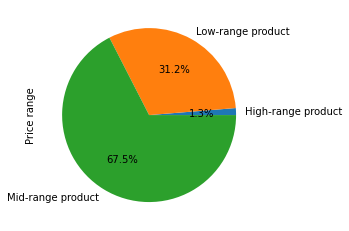

In [27]:
pricerange_loc = df_ord_prods_cust_new['price_range_loc'].value_counts().sort_index().plot.pie(ylabel = 'Price range', autopct = '%1.1f%%')

In [28]:
pricerange_loc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range.png'))

4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders

In [40]:
df_ord_prods_cust_new['product_name'].value_counts(dropna = False)

Banana                                     472565
Bag of Organic Bananas                     379450
Organic Strawberries                       264683
Organic Baby Spinach                       241921
NaN                                        236409
                                            ...  
Kefir Raspberry                                 1
Hot Chili with Beans                            1
Spinach Cheese Rice Palak Paneer Dinner         1
Coconut Bliss Pineapple Coconut                 1
Hot Oatmeal Multigrain Raisin                   1
Name: product_name, Length: 49662, dtype: int64

In [41]:
crosstab_freq_prods = pd.crosstab(df_ord_prods_cust_new['department_id'], df_ord_prods_cust_new['frequency_flag'], dropna = False )

In [42]:
crosstab_freq_prods

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department_id,,,
1.0,1392988,288174,553581
2.0,24041,4214,8036
3.0,781888,130089,260451
4.0,6457381,995663,2026247
5.0,102905,17953,32838
6.0,173710,33170,62373
7.0,1782602,305293,600228
8.0,59521,12005,26190
9.0,543529,111949,211149


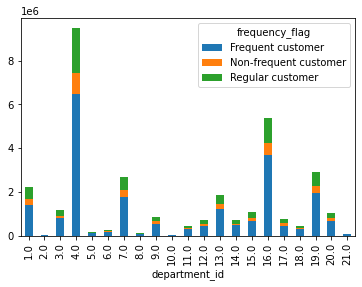

In [43]:
crosstab_freq_prods = crosstab_freq_prods.plot(kind = 'bar', stacked = True)

In [44]:
# Export file
crosstab_freq_prods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_freq_prods.png'))

5. Whats the distribution among users in regards to their brand loyalty?

In [45]:
loyal_cust = df_ord_prods_cust_new['loyalty_flag'].value_counts(dropna = False)

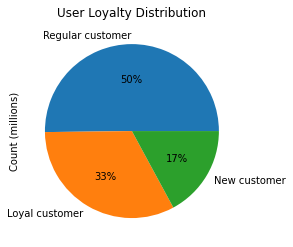

In [47]:
loyal_cust = loyal_cust.plot.pie(autopct='%1.0f%%', title = 'User Loyalty Distribution', ylabel = 'Count (millions)')

In [48]:
# Export file
loyal_cust.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_cust.png'))

Are there differences in ordering habits based on customers loyalty status?

In [50]:
loyalty_avg = pd.crosstab(df_ord_prods_cust_new['loyalty_flag'], df_ord_prods_cust_new['spending_flag'], dropna = False)

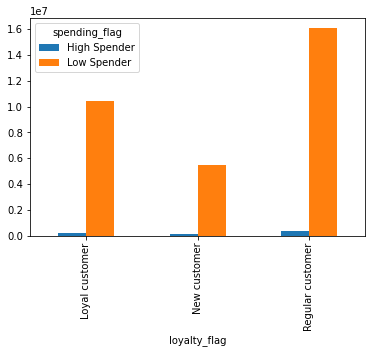

In [51]:
loyalty_avg = loyalty_avg.plot.bar()

In [52]:
# Export file
loyalty_avg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_avg.png'))

Are there differences in ordering habits based on customer's region?

In [53]:
loyalty_basedon_region = pd.crosstab(df_ord_prods_cust_new['region'], df_ord_prods_cust_new['loyalty_flag'], dropna = False)

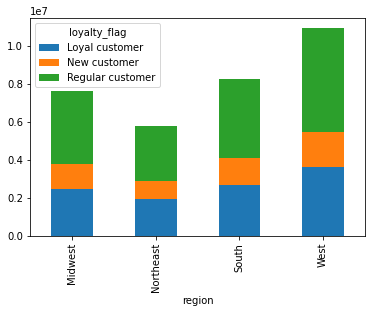

In [54]:
 loyalty_basedon_region = loyalty_basedon_region.plot.bar(stacked = True)

In [56]:
# Export visual
loyalty_basedon_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_basedon_region.png'))

Is there a connection between age and family status in terms of ordering habits?

In [60]:
order_habits = pd.crosstab(df_ord_prods_cust_new['loyalty_flag'], df_ord_prods_cust_new['number_of_dependants'], dropna = False)

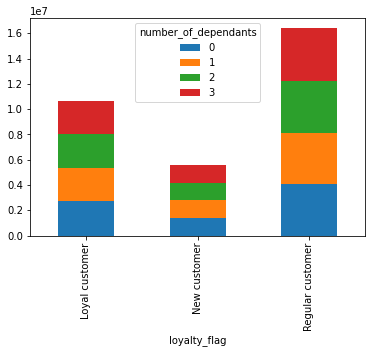

In [61]:
 order_habits = order_habits.plot.bar(stacked = True)

In [62]:
# Export visual
order_habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_habits.png'))